## Linear Regression

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form

$$
\large y = \large  \alpha x + \large  \beta + e
$$

where:
<br>$\alpha$ = *slope*
<br>$\beta$ = *intercept*. 
<br>$e$ = noise


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline

### Code Dictionary
code | description
-----|------------
`test_train_split(Features, Target, percentage_of_test)` | Using the Scikit learn library, Split arrays or matrices into random train and test subsets
`.LinearRegression()` | Linear regression model
`.fit()` | computes the results of the scikit learn model object like LinearRegression.  Effectively, it solves for $y = \alpha x + \beta + e$
`.summary()` | returns the summary from the computed results from `.fit()`
`.predict()` | Computes the result of new input data without output for a fitted model.
`plt.plot()` | Plot a line graph of data.
`plt.scatter()` | Plot a scatterplot of data.

We first load our data in pandas as a dataframe

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

How does our data look like?

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


We define what the features and target will be

In [4]:
X = dataset['YearsExperience']
y = dataset['Salary']

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Machine Learning "basic steps"
1. Split the data
2. Fit on train data
3. Predict on test data
4. Evaluate, optimize, repeat or release

#### 1. Split the data
We then create a random split of our data set with one third as test data set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

Explore each one of the parts

### Scikit-Learn

How to use such big library?

- Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
- Choose model hyperparameters by instantiating this class with desired values.
- Arrange data into a features matrix and target vector.
- Fit the model to your data by calling the ``fit()`` method of the model instance.
- Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

#### Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#### 2. Fit on train data

Here we apply our model to data.
This can be done with the ``fit()`` method of the model:

In [8]:
regressor.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [9]:
regressor.coef_

array([9345.94244312])

In [10]:
regressor.intercept_

26816.192244031183

#### 3. Predict on test data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

New data could be anything, we can manually try

In [11]:
any_value = [[100]] #years of experience

In [12]:
prediction = regressor.predict(any_value)

In [13]:
print("Predicted Salary: € {}".format(round(prediction[0],2)))

Predicted Salary: € 961410.44


Now let's do it with test data

In [14]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [15]:
for i in y_pred:
    print(i)

40835.105908714744
123079.39940819162
65134.556260832906
63265.36777220843
115602.64545369372
108125.89149919583
116537.23969800596
64199.96201652067
76349.68719257976
100649.13754469794


Let's visualize the results by plotting first the raw data, and then this model fit:

Text(0, 0.5, 'Salary')

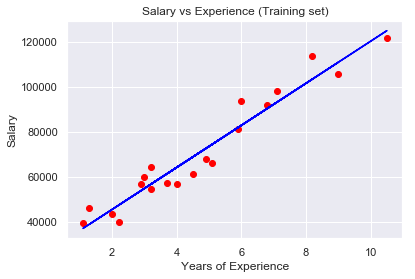

In [16]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

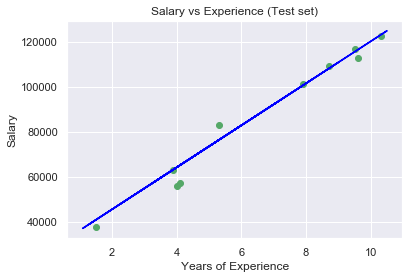

In [17]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_train, regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Let's supposed that the model is ready to go, the we save it.

In [18]:
from sklearn.externals import joblib

In [19]:
filename = 'my_first_model.sav'
joblib.dump(regressor, filename)

['my_first_model.sav']

Read again

In [20]:
loaded_model = joblib.load(filename)

In [21]:
loaded_model.predict([[1000]])

array([9372758.6353664])